In [1]:
#Cutomer Segmentation

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans






In [5]:
df = pd.read_csv("Mall_Customers.csv")

In [6]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.shape

(200, 5)

In [11]:
#Xhoosing annual income and Spending score

df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [15]:
df[['Annual Income (k$)','Spending Score (1-100)']]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [19]:
X = df.iloc[:,[3,4]].values

In [20]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [21]:
#choosing the clusters

<Axes: xlabel='Gender', ylabel='count'>

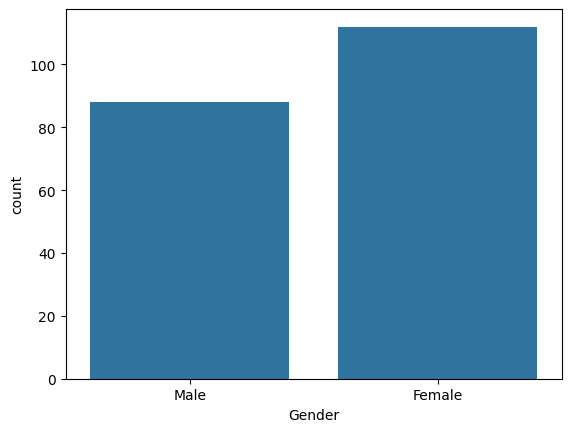

In [23]:
sns.countplot(x="Gender",data=df)

In [24]:
#WCSS - within clusters sum of squares

In [25]:
#finding wcss value for diff number of clusters

In [34]:
wcss = []
for i in range(1,11):
  kmeans =KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

In [31]:
#elbow graph


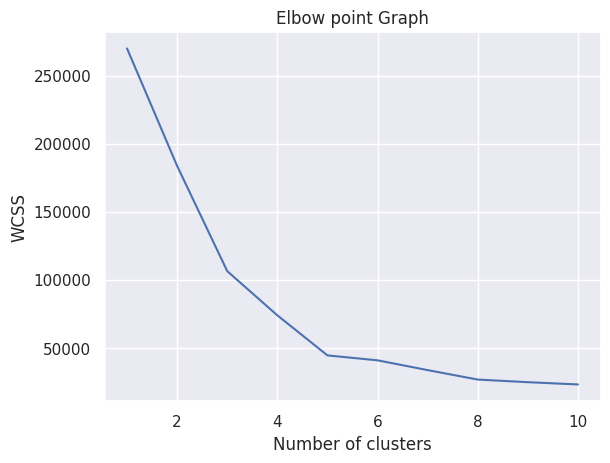

In [36]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title("Elbow point Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [37]:
# Optimum number of cluster will be 5


In [43]:
# Training the
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
#return label for each data point based on cluster
Y = kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [44]:
#Visualising all the clusters

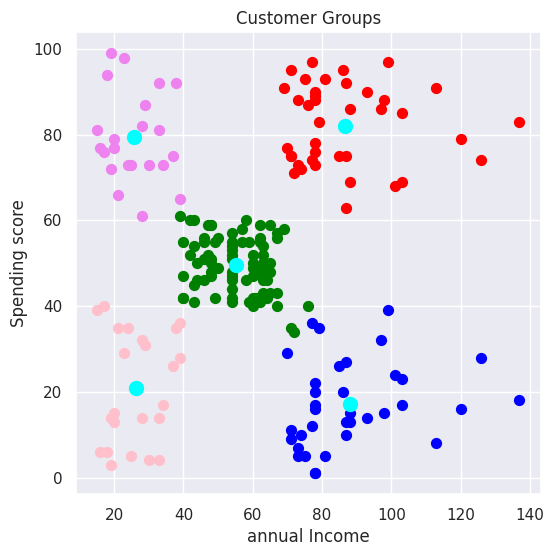

In [48]:


#plotiing the clusters and respective centroids

plt.figure(figsize=(6,6))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label = 'Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label = 'Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='blue',label = 'Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='pink',label = 'Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='violet',label = 'Cluster 5')

#plotting centroids

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')

plt.title("Customer Groups")
plt.xlabel("annual Income")
plt.ylabel("Spending score")
plt.show()


In [49]:
df['Cluster'] = kmeans.labels_

# print data for each cluster
for i in range(kmeans.n_clusters):
    print(f"\nCluster {i}")
    print(df[df['Cluster'] == i])


Cluster 0
     CustomerID  Gender  ...  Spending Score (1-100)  Cluster
43           44  Female  ...                      61        0
46           47  Female  ...                      55        0
47           48  Female  ...                      47        0
48           49  Female  ...                      42        0
49           50  Female  ...                      42        0
..          ...     ...  ...                     ...      ...
121         122  Female  ...                      40        0
122         123  Female  ...                      58        0
126         127    Male  ...                      35        0
132         133  Female  ...                      34        0
142         143  Female  ...                      40        0

[81 rows x 6 columns]

Cluster 1
     CustomerID  Gender  ...  Spending Score (1-100)  Cluster
123         124    Male  ...                      91        1
125         126  Female  ...                      77        1
127         128    Male  